## User Survey Responses in a hypothetical app

### Objective: Simulate and analyse user feedback from a survey to extract insights regarding usability, satisfaction and painpoints. Display basic visualisations and summary statistics to paint a clear picture for stakeholders. 

1. Generate Sample Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random

In [4]:
#use numpy to create responses, use a dictionary to store responses 

# Set seed for reproducibility
np.random.seed(42)

# Simulate survey data
n = 100  # number of respondents
data = {
    "usability_rating": np.random.randint(1, 6, n),
    "satisfaction_rating": np.random.randint(1, 6, n),
    "navigation_rating": np.random.randint(1, 6, n),
    "recommend_rating": np.random.randint(1, 6, n),
    "open_feedback": random.choices([
        "I found the app easy to use.",
        "Navigation was confusing.",
        "I love the clean design!",
        "It was hard to find what I needed.",
        "App crashed a few times.",
        "Great user experience overall.",
        "Needs a better onboarding tutorial."
    ], k=n)
}

In [6]:
#use pandas to show data produced in dataframe

df = pd.DataFrame(data)
print(df.head())  # Just display it for now

   usability_rating  satisfaction_rating  navigation_rating  recommend_rating  \
0                 4                    4                  2                 5   
1                 5                    1                  3                 5   
2                 3                    4                  1                 1   
3                 5                    2                  1                 5   
4                 5                    1                  4                 3   

                         open_feedback  
0             App crashed a few times.  
1         I found the app easy to use.  
2   It was hard to find what I needed.  
3             App crashed a few times.  
4  Needs a better onboarding tutorial.  


In [7]:
#import data visualisation libraries

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re


In [10]:
# --- Summary Statistics ---
print("📊 Summary Statistics:\n")
print(df.describe())


📊 Summary Statistics:

       usability_rating  satisfaction_rating  navigation_rating  \
count        100.000000           100.000000         100.000000   
mean           3.070000             2.930000           2.860000   
std            1.401695             1.437274           1.370836   
min            1.000000             1.000000           1.000000   
25%            2.000000             1.750000           1.000000   
50%            3.000000             3.000000           3.000000   
75%            4.000000             4.000000           4.000000   
max            5.000000             5.000000           5.000000   

       recommend_rating  
count        100.000000  
mean           2.980000  
std            1.456299  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            4.000000  
max            5.000000  


Means 
- Users averaged almost exactly down the middle line for 

In [11]:
# --- Correlation Matrix ---
print("\n🔗 Correlation Matrix:\n")
print(df.corr(numeric_only=True))


🔗 Correlation Matrix:

                     usability_rating  satisfaction_rating  navigation_rating  \
usability_rating             1.000000            -0.198097          -0.105242   
satisfaction_rating         -0.198097             1.000000           0.066750   
navigation_rating           -0.105242             0.066750           1.000000   
recommend_rating            -0.093326             0.129623           0.125077   

                     recommend_rating  
usability_rating            -0.093326  
satisfaction_rating          0.129623  
navigation_rating            0.125077  
recommend_rating             1.000000  


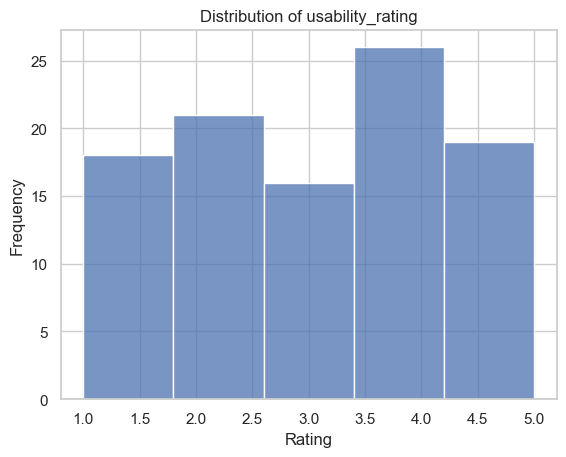

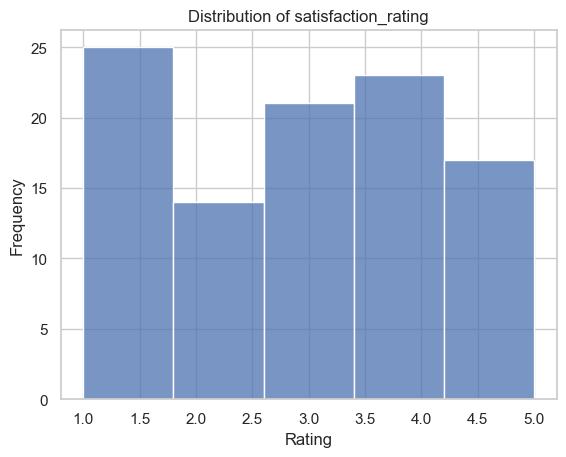

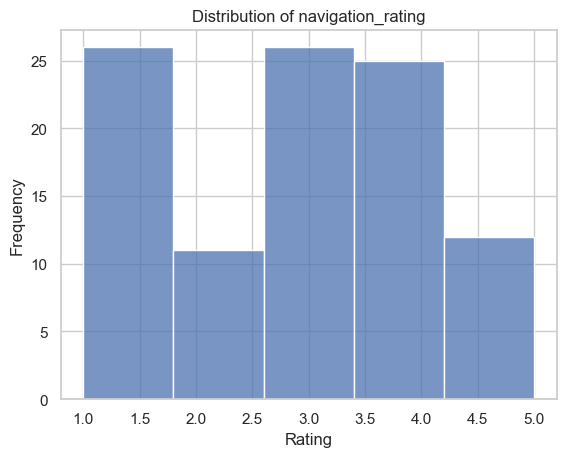

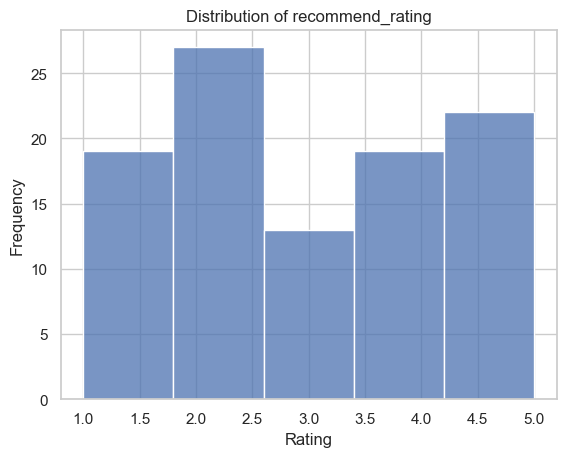

In [12]:
# --- Visualizations ---
sns.set(style="whitegrid")
for column in df.columns[:-1]:  # skip 'open_feedback'
    sns.histplot(df[column], bins=5, kde=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.show()

In [13]:
 #Text Feedback Analysis ---
print("\n📝 Most Common Words in Open Feedback:\n")

# Combine all feedback into one string and clean it
all_feedback = " ".join(df["open_feedback"]).lower()
words = re.findall(r'\b[a-z]{3,}\b', all_feedback)  # remove short words & punctuation
word_freq = Counter(words)

# Display top 10 frequent words
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")


📝 Most Common Words in Open Feedback:

the: 36
was: 31
app: 28
love: 19
clean: 19
design: 19
navigation: 18
confusing: 18
found: 17
easy: 17
